# Calibration
This file analyzes the single harmonic 440Hz sine tone to calibrate the microphone

This is to verify that it is a pure sine wave

In [75]:
import numpy as np
import scipy.signal
from scipy.io import wavfile
import matplotlib.pyplot as plt

Sampling rate: 48000 


/var/folders/z7/38nrk_xn0gg2mnhxz1rbjtt00000gn/T/ipykernel_51868/3765231207.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, mic_1_calib = wavfile.read('../data/calibration_recordings/02_28/mic1_a440_2.WAV')
/var/folders/z7/38nrk_xn0gg2mnhxz1rbjtt00000gn/T/ipykernel_51868/3765231207.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, mic_2_calib = wavfile.read('../data/calibration_recordings/02_28/mic2_a440_2.WAV')
/var/folders/z7/38nrk_xn0gg2mnhxz1rbjtt00000gn/T/ipykernel_51868/3765231207.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, mic_3_calib = wavfile.read('../data/calibration_recordings/02_28/mic3_a440_2.WAV')
/var/folders/z7/38nrk_xn0gg2mnhxz1rbjtt00000gn/T/ipykernel_51868/3765231207.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, gt_calib = wavfile.read('../data/calibration_recordings/02_28/gt_a440_2.WAV')


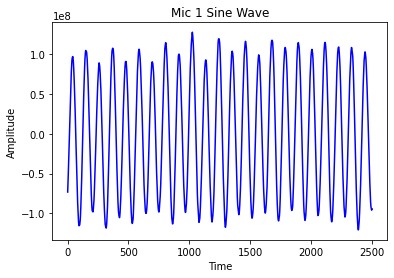

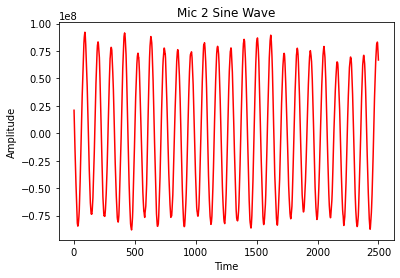

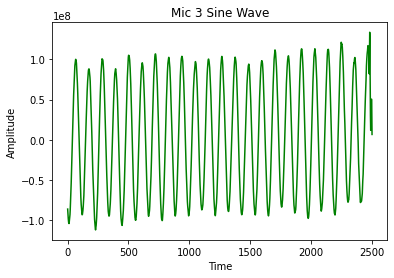

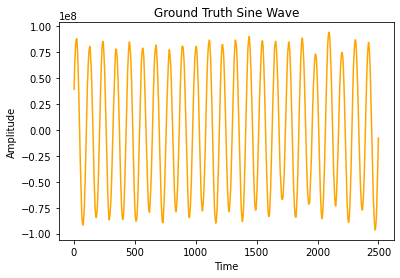

In [76]:
# Getting the 440Hz Sine Tone
fs, mic_1_calib = wavfile.read('../data/calibration_recordings/02_28/mic1_a440_2.WAV')
_, mic_2_calib = wavfile.read('../data/calibration_recordings/02_28/mic2_a440_2.WAV')
_, mic_3_calib = wavfile.read('../data/calibration_recordings/02_28/mic3_a440_2.WAV')
_, gt_calib = wavfile.read('../data/calibration_recordings/02_28/gt_a440_2.WAV')

# Note: Ground truth recording for 02_28 was incorrect gain level

# Finding the sampling rate
print(f'Sampling rate: {fs} ')

start = 1000
end = 3500

# Getting the omnidirectional channels
mic1_w = mic_1_calib[:, 0].astype(float)
mic2_w = mic_2_calib[:, 0].astype(float)
mic3_w = mic_3_calib[:, 0].astype(float)
gt_w = gt_calib[:, 0].astype(float)

# Shorten the w components
mic1_w_shortened = mic1_w[start:end]
mic2_w_shortened = mic2_w[start:end]
mic3_w_shortened = mic3_w[start:end]
gt_w_shortened = gt_w[start:end]

# Plotting the tone
time_shortened = np.arange(1, mic1_w_shortened.shape[0] + 1)

# Plotting the graph
plt.plot(time_shortened, mic1_w_shortened, color='blue')
plt.title('Mic 1 Sine Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.plot(time_shortened, mic2_w_shortened, color='red')
plt.title('Mic 2 Sine Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.plot(time_shortened, mic3_w_shortened, color='green')
plt.title('Mic 3 Sine Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.plot(time_shortened, gt_w_shortened, color='orange')
plt.title('Ground Truth Sine Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()



# Plotting the frequency response
I want to plot the frequency response of the microphones to make sure to remove any variations


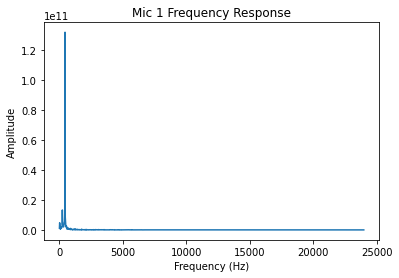

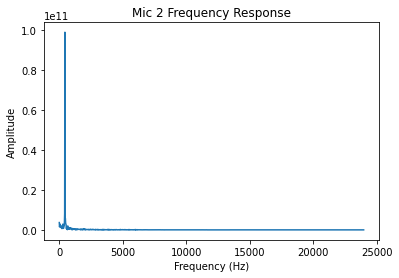

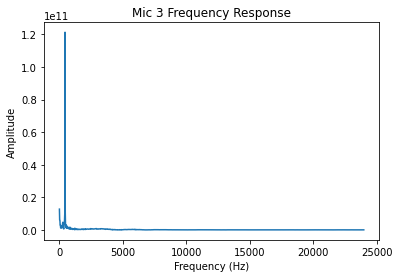

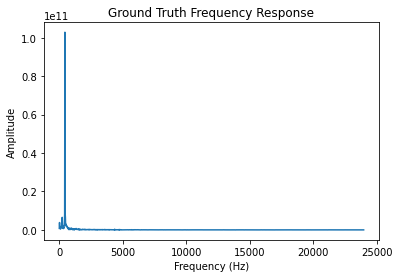

In [77]:
from scipy.fft import fft
def plot_frequency_response(signal, fs, title):
    n = len(signal)
    freq = np.fft.fftfreq(n, d=1/fs)
    spectrum = fft(signal)

    # Calibrating the y-values to be within a range of 0-1000
    plt.plot(freq[:n//2], np.abs(spectrum[:n//2]))
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()

plot_frequency_response(mic1_w_shortened, fs, 'Mic 1 Frequency Response')
plot_frequency_response(mic2_w_shortened, fs, 'Mic 2 Frequency Response')
plot_frequency_response(mic3_w_shortened, fs, 'Mic 3 Frequency Response')
plot_frequency_response(gt_w_shortened, fs, 'Ground Truth Frequency Response')

# Analyzing the outputs from microphones

1. Place the microphones 2m away from the sound source. Note that all microphones should be facing the same direction
2. Play the 440Hz sine wave with a flat speaker, perform a 10 second recording with the microphones.
3. Load all four microphone outputs here. 
4. Find some equation to normalize the sound to the same amplitude. 

In [78]:
# Normalizing each of the microphones

def normalize_mic(signal):
    return (signal - np.mean(signal)) / np.std(signal)

mic1_w_normalized = normalize_mic(mic1_w_shortened)
mic2_w_normalized = normalize_mic(mic2_w_shortened)
mic3_w_normalized = normalize_mic(mic3_w_shortened)
gt_w_normalized = normalize_mic(gt_w_shortened)


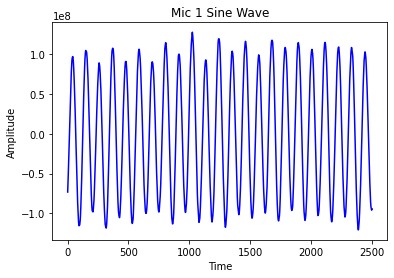

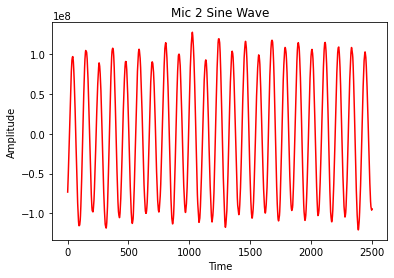

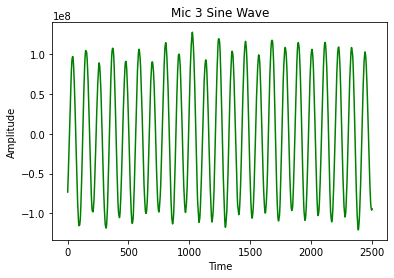

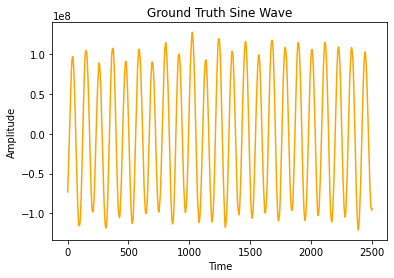

In [79]:
# Plotting the normalized signals

def plot_signal(time, signal, title, color='blue'):
    plt.plot(time_shortened, mic1_w_shortened, color)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

plot_signal(time_shortened, mic1_w_normalized, 'Mic 1 Sine Wave', color='blue')
plot_signal(time_shortened, mic2_w_normalized, 'Mic 2 Sine Wave', color='red')
plot_signal(time_shortened, mic3_w_normalized, 'Mic 3 Sine Wave', color='green')
plot_signal(time_shortened, gt_w_normalized, 'Ground Truth Sine Wave', color='orange')